# Purpose

The purpose of this notebook is to simulate the effectiveness of different camera positions on a bot of set dimensions to have sight of april tags placed around the field.

In [1]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


In [2]:
# Define basic field parameters
field_width = 820 # cm
field_length = 1654# cm

# define bot parameters
bot_width = 76 # cm
bot_length = 76 # cm

In [3]:
april_tag_size = 16.51 #
april_tag_positions = np.array([[593.68,   9.68, 120.  ],
                          [637.21,  34.79, 120.  ],
                          [652.73, 196.17, 180.  ],
                          [652.73, 218.42, 180.  ],
                          [578.77, 323.  , 270.  ],
                          [ 72.5 , 323.  , 270.  ],
                          [ 3.93, 218.42,   0.  ],
                          [ 3.93 , 196.17,   0.  ],
                          [ 14.02,  34.79,  60.  ],
                          [ 57.54,   9.68,  60.  ],
                          [468.69, 146.19, 300.  ],
                          [468.69, 177.1 ,  60.  ],
                          [441.74, 161.62, 180.  ],
                          [209.48, 161.62,   0.  ],
                          [182.73, 177.1 , 120.  ],
                          [182.73, 146.19, 240.  ]])
 # 2D array of april tag positions (x, y, theta) in inches
# Convert inches to centimeters by multiplying by 2.54
april_tag_positions[:, :2] *= 2.54
print(april_tag_positions)



[[1507.9472   24.5872  120.    ]
 [1618.5134   88.3666  120.    ]
 [1657.9342  498.2718  180.    ]
 [1657.9342  554.7868  180.    ]
 [1470.0758  820.42    270.    ]
 [ 184.15    820.42    270.    ]
 [   9.9822  554.7868    0.    ]
 [   9.9822  498.2718    0.    ]
 [  35.6108   88.3666   60.    ]
 [ 146.1516   24.5872   60.    ]
 [1190.4726  371.3226  300.    ]
 [1190.4726  449.834    60.    ]
 [1122.0196  410.5148  180.    ]
 [ 532.0792  410.5148    0.    ]
 [ 464.1342  449.834   120.    ]
 [ 464.1342  371.3226  240.    ]]


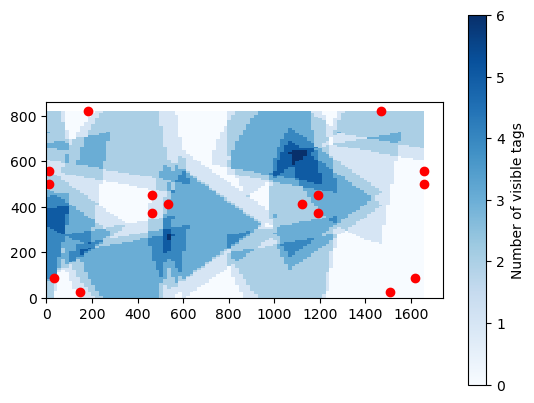

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid of positions
x = np.linspace(0, field_length, 100)
y = np.linspace(0, field_width, 100)
X, Y = np.meshgrid(x, y)

# Initialize an array to store the counts
counts = np.zeros_like(X)

# Calculate the FOV
fov_angle = 70  # degrees
fov_radius = 750  # maximum possible distance (arbitrary 7.5 meters)
cameras = [(bot_length, bot_width/2, 0), (-bot_length / 2, bot_width / 2, 45), (-bot_length / 2, -bot_width / 2, -45)]
#cameras = [(bot_length, bot_width/2, 0)]
# For each position
# For each position
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        # Calculate the position of the bot
        bot_x = X[i, j]
        bot_y = Y[i, j]

        # Count the number of AprilTags within the FOV for each camera
        count = 0
        for camera_dx, camera_dy, camera_orientation in cameras:
            camera_x = bot_x + camera_dx
            camera_y = bot_y + camera_dy

            for tag_x, tag_y, tag_theta in april_tag_positions:
                dx = tag_x - camera_x
                dy = tag_y - camera_y
                distance = np.hypot(dx, dy)
                
                # Adjust the calculation of the angle to take into account the camera orientation
                angle = np.degrees(np.arctan2(dy, dx)) - camera_orientation

                # Normalize the angle to the range [-180, 180]
                angle = (angle + 180) % 360 - 180

                # Calculate the absolute difference between the camera's orientation and tag_theta
                orientation_diff = np.abs(camera_orientation - tag_theta)

                # Normalize the orientation_diff to the range [0, 180]
                orientation_diff = (orientation_diff + 180) % 360 - 180

                # Check if the tag is within the FOV and the front of the tag is visible
                if distance <= fov_radius and -fov_angle / 2 <= angle <= fov_angle / 2 and orientation_diff <= 90:
                    count += 1

        # Update the counts array with the count for this position
        counts[i, j] = count

# Create the heatmap
plt.imshow(counts, extent=[0, field_length, 0, field_width], origin='lower', cmap='Blues', interpolation='nearest')
plt.colorbar(label='Number of visible tags')

# Plot the tags
tag_x, tag_y, _ = zip(*april_tag_positions)
plt.scatter(tag_x, tag_y, color='red')

# Save the figure before showing it
plt.savefig('heatmap.png')

# Show the plot
plt.show()


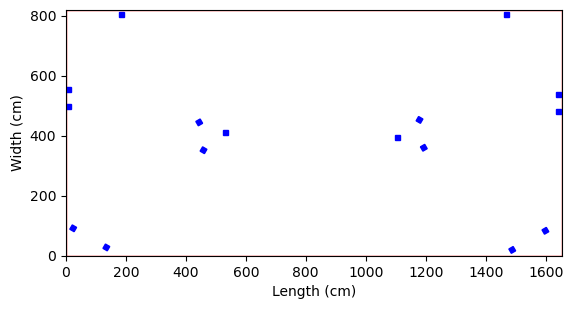

In [23]:
# Calculate the position of the bot
bot_x = field_length / 2
bot_y = field_width / 2

# Create a new figure
fig, ax = plt.subplots()

# Create a rectangle patch for the field
rect = patches.Rectangle((0, 0), field_length, field_width, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

# Set the limits of the plot to the size of the field
plt.xlim(0, field_length)
plt.ylim(0, field_width)

# Make scales the same
ax.set_aspect('equal')

# Add labels
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')

# Add the AprilTags to the plot as small rectangles
for position in april_tag_positions:
    x, y, theta = position
    tag = patches.Rectangle((x - april_tag_size / 2, y - april_tag_size / 2), april_tag_size, april_tag_size, angle=theta, color='blue')
    ax.add_patch(tag)

plt.savefig('april_tags.png')

# Show the plot
plt.show()